In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv


 **Knowing the Dataset**

In [2]:
%%time
DATASET_COLUMNS = ["label", "ids", "date", "flag", "user", "tweet"]
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv("/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv", encoding =DATASET_ENCODING , names=DATASET_COLUMNS)
df.head()

CPU times: user 4.37 s, sys: 521 ms, total: 4.9 s
Wall time: 7.25 s


,label,ids,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
%%time
df.drop(['ids','date','flag','user'],axis=1,inplace=True)

CPU times: user 26.4 ms, sys: 13.8 ms, total: 40.2 ms
Wall time: 40.1 ms


In [4]:
%%time
df.head()

CPU times: user 141 µs, sys: 20 µs, total: 161 µs
Wall time: 171 µs


,label,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


CPU times: user 574 ms, sys: 320 ms, total: 894 ms
Wall time: 1.08 s


<AxesSubplot:xlabel='label', ylabel='count'>

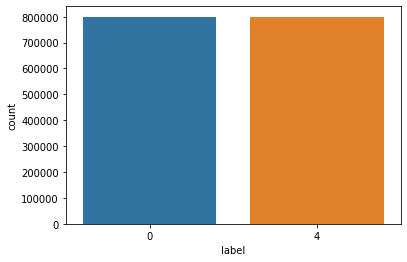

In [5]:
%%time
import seaborn as s
s.countplot(x='label',data=df)

In [6]:
df

,label,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


In [7]:
%%time
df['label'].unique()

CPU times: user 12.3 ms, sys: 37 µs, total: 12.3 ms
Wall time: 12 ms


array([0, 4])

In [8]:
%%time
df["label"].replace({4:1}, inplace=True)

CPU times: user 4.17 ms, sys: 1.03 ms, total: 5.2 ms
Wall time: 4.04 ms


In [9]:
%%time
df

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.3 µs


,label,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,1,Just woke up. Having no school is the best fee...
1599996,1,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...


In [10]:
%%time
df.isnull().sum()

CPU times: user 150 ms, sys: 1.04 ms, total: 151 ms
Wall time: 149 ms


label    0
tweet    0
dtype: int64

In [11]:
# df['tweet'] = df['tweet'].apply(str)
# df['label'] = df['label'].apply(str)

In [12]:
df.shape

(1600000, 2)

In [13]:
df.describe()

,label
count,1600000.0
mean,0.5
std,0.5
min,0.0
25%,0.0
50%,0.5
75%,1.0
max,1.0


**Pre-Processing**

In [14]:
%%time
df.head()

CPU times: user 154 µs, sys: 0 ns, total: 154 µs
Wall time: 159 µs


,label,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [15]:
df['tweet'].dtype

dtype('O')

In [16]:
df['label'].dtype

dtype('int64')

In [17]:
%%time
df['label'] = df['label'].apply(str)

CPU times: user 425 ms, sys: 55.9 ms, total: 481 ms
Wall time: 480 ms


In [18]:
df['label'].dtype

dtype('O')

In [19]:
%%time
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
{'again', "haven't", 'the', 'by', 'here', 'hasn', "mustn't", 'shan', 'y', "hadn't", 'of', 'did', 'which', 'where', 'with', 'against', 'having', 'some', 'himself', 'how', 'off', 'it', "didn't", 'yourself', 'own', "won't", 'all', 'aren', 'is', 'who', 'be', 'isn', 'no', 'doing', 'your', 'couldn', 'you', 'whom', 'most', 'theirs', 'had', 'wasn', 'its', 'he', 'any', 'very', 'then', 'won', 'a', "don't", 'itself', 'were', 'him', 'ain', "you're", 'and', 'ma', "you'll", 'have', 'can', 'once', 'such', "hasn't", 'are', 'mightn', "it's", 'over', 'i', 'too', "wouldn't", 'during', 'does', "you'd", 'now', 'into', "wasn't", 'if', 'doesn', 'their', 'under', 'but', 'don', 'why', 'between', "aren't", 'as', 'an', 'being', 'myself', 'after', 'further', 'so', "shan't", "weren't", 'my', 'out', 'than', 'just', 'didn', 'shouldn', 'because', 'down', 'her', 'there', 'to', 'up', "shouldn't", 'wouldn

In [20]:
# %%time
# nltk.download('punkt')
# nltk.download('wordnet')

In [21]:
import string

In [22]:
EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

In [23]:
%%time
import re
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'

def process_tweets(tweet):
    # Lower Casing
    tweet = tweet.lower()
    tweet=tweet[0:]
    # Removing all URls 
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet)
    #Conversion of emoticons to words
    for emot in EMOTICONS:
        tweet = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), tweet)
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    #reducing a word to its word stem 
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
        if len(w)>1:
            word = wordLemm.lemmatize(w)
            finalwords.append(word)
    return ' '.join(finalwords)

CPU times: user 9 µs, sys: 0 ns, total: 9 µs
Wall time: 12.2 µs


In [24]:
%%time
df = df.sample(frac=1)
df = df[:200000]

CPU times: user 935 ms, sys: 57.7 ms, total: 992 ms
Wall time: 991 ms


In [25]:
%%time
df

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 14.8 µs


,label,tweet
766601,0,"It's so hot, my kit kat melted"
343452,0,urgh. just woke up. still kinda sunny. beach y...
132769,0,I hate taking naps during the day...they feel ...
209866,0,"Show of Mcfly today here in RJ, and I don't go"
674464,0,@DJ_JOJ ur too busy for me now but that's a g...
...,...,...
1499141,1,@tdale07 You like the new name??? I thought it...
639477,0,@DOOMSlay i wish u were gonna b at warped
992081,1,no one realizes how tempted i am to wear that ...
986125,1,@UltimatumShadow I agreee!!!! he is soooooo h...


In [26]:
df.shape

(200000, 2)

In [27]:
%%time
df['temp'] = df['tweet'].apply(lambda x: process_tweets(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.
CPU times: user 2min 38s, sys: 428 ms, total: 2min 39s
Wall time: 2min 39s


In [28]:
df

,label,tweet,temp
766601,0,"It's so hot, my kit kat melted",hot kit kat melted
343452,0,urgh. just woke up. still kinda sunny. beach y...,urgh woke still kinda sunny beach yesterday fu...
132769,0,I hate taking naps during the day...they feel ...,hate taking nap daythey feel good refreshedhad...
209866,0,"Show of Mcfly today here in RJ, and I don't go",show mcfly today rj dont go
674464,0,@DJ_JOJ ur too busy for me now but that's a g...,ur busy thats good thing though keep big thing
...,...,...,...
1499141,1,@tdale07 You like the new name??? I thought it...,like new name thought appropriate
639477,0,@DOOMSlay i wish u were gonna b at warped,wish gon na warped
992081,1,no one realizes how tempted i am to wear that ...,one realizes tempted wear hideous neon colored...
986125,1,@UltimatumShadow I agreee!!!! he is soooooo h...,agreee soooooo hot


In [29]:
%%time
# DataFrame
import pandas as pd 

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier

# tensorflow
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

# Utility
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle

CPU times: user 2.37 s, sys: 639 ms, total: 3.01 s
Wall time: 7.54 s


In [30]:
X = df['temp'].values
y = df['label'].values

In [31]:
X.shape

(200000,)

In [32]:
# from sklearn.model_selection import StratifiedKFold
# skf=StratifiedKFold(n_splits=4)
# skf

In [33]:
print(type(X))

<class 'numpy.ndarray'>


In [34]:
# words = ''.join(str(df['temp'].tolist()))
# words

In [35]:
vector = TfidfVectorizer(ngram_range=(1,2),sublinear_tf=True)
X = vector.fit_transform(X)
print(f'Vector fitted.')
print('No. of feature_words: ', len(vector.get_feature_names()))

Vector fitted.
No. of feature_words:  852431


In [36]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(solver='liblinear'),X,y,cv=5)

array([0.776725, 0.7808  , 0.77675 , 0.7751  , 0.77735 ])

In [37]:
from sklearn.model_selection import cross_val_score
cross_val_score(LinearSVC(),X,y,cv=5)

array([0.77155 , 0.779375, 0.77425 , 0.7711  , 0.77505 ])

In [38]:
%%time
from sklearn.model_selection import cross_val_score
cross_val_score(BernoulliNB(),X,y,cv=5)

CPU times: user 11.3 s, sys: 138 ms, total: 11.4 s
Wall time: 11.4 s


array([0.7627  , 0.7659  , 0.764225, 0.7602  , 0.767   ])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=101)

In [40]:
type(X_test)

scipy.sparse.csr.csr_matrix

In [41]:
print(X.shape)
print(y.shape)

(200000, 852431)
(200000,)


In [42]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140000, 852431)
(140000,)
(60000, 852431)
(60000,)


In [43]:
%%time
def model_Evaluate(model):
    #accuracy of model on training data
    acc_train=model.score(X_train, y_train)
    #accuracy of model on test data
    acc_test=model.score(X_test, y_test)
    
    print('Accuracy of model on training data : {}'.format(acc_train*100))
    print('Accuracy of model on testing data : {} \n'.format(acc_test*100))

    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.58 µs


In [44]:
%%time
from sklearn.model_selection import GridSearchCV
grid_values = {'penalty': ['l1','l2'], 'C': [0.01,0.1,1,10,100]}
grid_search=GridSearchCV(estimator=LogisticRegression(),
                        param_grid=grid_values,
                        scoring='accuracy',
                        cv=10,
                        n_jobs=-1)
grid_search=grid_search.fit(X_train,y_train)

CPU times: user 55.7 s, sys: 44.8 s, total: 1min 40s
Wall time: 4min 54s


In [45]:
grid_search.best_params_

{'C': 1, 'penalty': 'l2'}

Accuracy of model on training data : 87.90857142857142
Accuracy of model on testing data : 77.535 

              precision    recall  f1-score   support

           0       0.79      0.75      0.77     29971
           1       0.76      0.80      0.78     30029

    accuracy                           0.78     60000
   macro avg       0.78      0.78      0.78     60000
weighted avg       0.78      0.78      0.78     60000

CPU times: user 54.9 s, sys: 43.6 s, total: 1min 38s
Wall time: 33.1 s


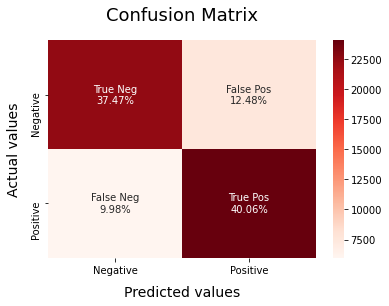

In [46]:
%%time
# lg = LogisticRegression(penalty='l2', dual=False, tol=0.01, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight='balanced', random_state=5, solver='lbfgs', max_iter=1000, multi_class='ovr', verbose=0, warm_start=False)
lg =LogisticRegression(max_iter=100,C=1,penalty='l2')
lg.fit(X_train, y_train)
model_Evaluate(lg)

In [47]:
%%time
from sklearn.model_selection import GridSearchCV

grid_values = {'penalty': ['l1','l2'],'C': [0.1, 1, 10, 100, 1000],'fit_intercept':[True,False]} 
  
grid = GridSearchCV(estimator=LinearSVC(),param_grid=grid_values)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

CPU times: user 16min 50s, sys: 122 ms, total: 16min 50s
Wall time: 16min 51s


GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2']})

In [48]:
grid.best_params_

{'C': 0.1, 'fit_intercept': True, 'penalty': 'l2'}

Accuracy of model on training data : 88.05714285714285
Accuracy of model on testing data : 77.55333333333333 

              precision    recall  f1-score   support

           0       0.79      0.75      0.77     29971
           1       0.76      0.80      0.78     30029

    accuracy                           0.78     60000
   macro avg       0.78      0.78      0.78     60000
weighted avg       0.78      0.78      0.78     60000

CPU times: user 9.07 s, sys: 5.24 ms, total: 9.08 s
Wall time: 9.07 s


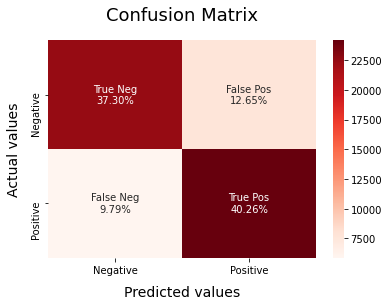

In [49]:
%%time
svm = LinearSVC(C=0.1,fit_intercept=True,penalty='l2')
svm.fit(X_train, y_train)
model_Evaluate(svm)

In [50]:
BernoulliNB().get_params().keys()

dict_keys(['alpha', 'binarize', 'class_prior', 'fit_prior'])

In [51]:
%%time
from sklearn.model_selection import GridSearchCV

grid_values = {'alpha' : [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0],'fit_prior':[True,False]} 
  
grid = GridSearchCV(estimator=BernoulliNB(),param_grid=grid_values)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

CPU times: user 2min 9s, sys: 3.61 s, total: 2min 12s
Wall time: 2min 12s


GridSearchCV(estimator=BernoulliNB(),
             param_grid={'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0,
                                   10.0],
                         'fit_prior': [True, False]})

In [52]:
grid.best_params_

{'alpha': 10.0, 'fit_prior': True}

Accuracy of model on training data : 94.80285714285715
Accuracy of model on testing data : 76.07833333333333 

              precision    recall  f1-score   support

           0       0.78      0.72      0.75     29971
           1       0.74      0.80      0.77     30029

    accuracy                           0.76     60000
   macro avg       0.76      0.76      0.76     60000
weighted avg       0.76      0.76      0.76     60000



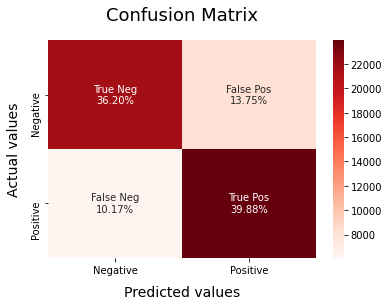

In [53]:
nb = BernoulliNB(alpha=1.0,fit_prior=False)
nb.fit(X_train, y_train)
model_Evaluate(nb)

In [54]:
# %%time
# from sklearn.model_selection import GridSearchCV

# grid_values = {'n_estimators' :[10,20,30],'criterion':['gini', 'entropy'],'max_depth':[10,20,30,40,50],'max_features' : ["auto","sqrt", "log2","None"]} 
  
# grid = GridSearchCV(estimator=RandomForestClassifier(),param_grid=grid_values)

# grid.fit(X_train, y_train)

In [55]:
# %%time
# from sklearn.tree import DecisionTreeClassifier
# clf_tree = DecisionTreeClassifier(criterion="entropy", max_depth=10, random_state=13)
# clf_tree.fit(X_train,y_train)
# model_Evaluate(clf_tree)

In [56]:
# rf = RandomForestClassifier()
# rf.fit(X_train, y_train)
# model_Evaluate(rf)

In [57]:
# %%time
# from sklearn.tree import DecisionTreeClassifier
# clf_tree = DecisionTreeClassifier(criterion="gini", max_depth=10, random_state=1)
# clf_tree.fit(X_train,y_train)
# model_Evaluate(clf_tree)

In [58]:
# %%time
# from sklearn.model_selection import RandomizedSearchCV
# grid_values = {'criterion':['gini'],
#               'max_depth':[1,5,10,None]}
# grid_search=RandomizedSearchCV(estimator=DecisionTreeClassifier(),
#                         param_distributions=grid_values,
#                         scoring='accuracy')
# grid_search=grid_search.fit(X_train,y_train)

Accuracy of model on training data : 88.24214285714285
Accuracy of model on testing data : 77.58500000000001 

              precision    recall  f1-score   support

           0       0.79      0.75      0.77     29971
           1       0.76      0.80      0.78     30029

    accuracy                           0.78     60000
   macro avg       0.78      0.78      0.78     60000
weighted avg       0.78      0.78      0.78     60000

CPU times: user 56.7 s, sys: 42.8 s, total: 1min 39s
Wall time: 35.4 s


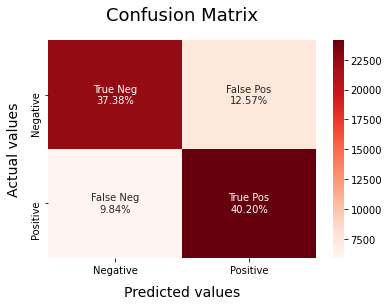

In [59]:
%%time
from sklearn.ensemble import VotingClassifier
Ens = VotingClassifier( estimators= [('LG',lg),('SVM',svm),('NB',nb)], voting = 'hard')
Ens.fit(X_train,y_train)
model_Evaluate(Ens)

In [60]:
from joblib import dump, load
dump(Ens, 'tweeter.joblib')

['tweeter.joblib']

In [61]:
import pickle

file = open('vectoriser.pickle','wb')
pickle.dump(vector, file)
file.close()

file = open('Ens1.pickle','wb')
pickle.dump(Ens, file)
file.close()

In [62]:
def load_models():
    # Load the vectoriser.
    file = open('vectoriser.pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    # Load the LR Model.
    file = open('Ens1.pickle', 'rb')
    Ens = pickle.load(file)
    file.close()
    return vectoriser, Ens

In [63]:
def predict(vectoriser, model, text):
    # Predict the sentiment
    processes_text=[process_tweets(sen) for sen in text]
    textdata = vectoriser.transform(processes_text)
    print(textdata.shape)
    sentiment = model.predict(textdata)
    return sentiment

In [67]:
if __name__=="__main__":
    # Loading the models.
    vectoriser, Ens1 = load_models()
    
    # Text to classify should be in a list.
    text = ["i am lucky to have this project :)",
            "Work is too hectic.",
            "Mr.Sharama, I am so good"]
    
    df = predict(vectoriser, Ens1, text)
    print(df)

(3, 852431)
['1' '0' '1']


In [ ]:
# %%time
# from sklearn.ensemble import VotingClassifier
# Ens = VotingClassifier(  estimators= [('LG',lg),('RF',rf),('NB',nb),('DT',clf_tree)], voting = 'soft')
# Ens.fit(X_train , y_train)
# model_Evaluate(Ens)

In [ ]:
import pickle

file = open('vectoriser.pickle','wb')
pickle.dump(vector, file)
file.close()

file = open('logis.pickle','wb')
pickle.dump(lg, file)
file.close()

In [ ]:
def load_models():
    # Load the vectoriser.
    file = open('vectoriser.pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    # Load the LR Model.
    file = open('logis.pickle', 'rb')
    mod= pickle.load(file)
    file.close()
    return vectoriser, Ens

In [ ]:
def predict(vector, model, text):
    # Predict the sentiment
    processes_text=[process_tweets(sen) for sen in text]
    textdata = vector.transform(processes_text)
    sentiment = model.predict(textdata)
    return sentiment

In [ ]:
if __name__=="__main__":
    # Loading the models.
    vectoriser, logis = load_models()
    
    # Text to classify should be in a list.
    text = ["i am lucky to have this project :)",
            "Work is too hectic.",
            "Mr.Sharama, I feel so good"]
    
    df = predict(vector, logis, text)
    print(df.head())

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors=3)
# knn.fit(X_train,y_train)
# model_Evaluate(knn)

In [ ]:
# from xgboost import XGBRegressor
# my_model = XGBRegressor()
# my_model.fit(X_train, y_train,verbose=False)
# model_Evaluate(my_model)